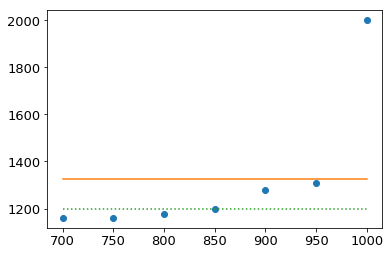

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib
import numpy as np
import collections

from scipy.optimize import minimize_scalar
from sklearn.metrics import mean_squared_error, mean_absolute_error
#rc('text', usetex=True)
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['mathtext.rm'] = 'serif'
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13) 

bookcolors = {'crimson': '#a50026', 'red': '#d73027', 'redorange': '#f46d43',
              'orange': '#fdae61', 'yellow': '#fee090', 'sky': '#e0f3f8', 
              'babyblue': '#abd9e9', 'lightblue': '#74add1', 'blue': '#4575b4',
              'purple': '#313695'}

def data():
    df = pd.DataFrame(data={"sqfeet":[700, 750, 800, 850, 900,950,1000]})
    df["rent"] = pd.Series([1160, 1160, 1175, 1200, 1280,1310,2000])
    df = df.sort_values('sqfeet')
    return df

def get_leaf_samples(t):
    samples = collections.defaultdict(list)
    dec_paths = t.decision_path(df.sqfeet.values.reshape(-1, 1))
    for d, dec in enumerate(dec_paths):
        for i in range(t.tree_.node_count):
            if dec.toarray()[0][i]  == 1:
                samples[i].append(d)
    return samples

df = data()
plt.plot(df.sqfeet,df.rent,'o')

m = df.rent.mean()
mm = np.empty(len(df))
mm.fill(m)
plt.plot(df.sqfeet,mm)

md = df.rent.median()
md2 = np.empty(len(df))
md2.fill(md)
plt.plot(df.sqfeet,md2, linestyle=':')
plt.show()

In [2]:
M = 1
f0 = df.rent.median()
df['F0'] = f0

for s in range(1,M+1):
    df[f'res{s}'] = df.rent - df[f'F{s-1}']
    df[f'sign{s}'] = np.sign(df[f'res{s}'])

df

,sqfeet,rent,F0,res1,sign1
0,700,1160,1200.0,-40.0,-1.0
1,750,1160,1200.0,-40.0,-1.0
2,800,1175,1200.0,-25.0,-1.0
3,850,1200,1200.0,0.0,0.0
4,900,1280,1200.0,80.0,1.0
5,950,1310,1200.0,110.0,1.0
6,1000,2000,1200.0,800.0,1.0


## Show decision tree for residual

[0, 1, 2, 3, 4, 5] [6]


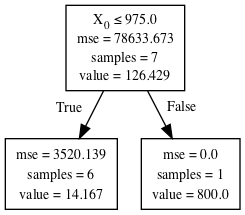

In [7]:
from sklearn import tree
from sklearn.externals.six import StringIO  
import pydotplus # must install
from IPython.display import Image  

t = tree.DecisionTreeRegressor(max_depth=1)
t.fit(df.sqfeet.values.reshape(-1, 1), df.res1)
t.predict(df.sqfeet.values.reshape(-1, 1))
print(get_leaf_samples(t)[1], get_leaf_samples(t)[2])

dot_data = StringIO()
tree.export_graphviz(t, dot_data, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


## Show decision tree for residual

[0, 1, 2] [3, 4, 5, 6]


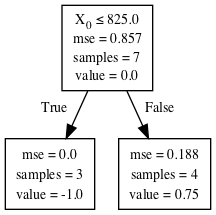

In [8]:
t = tree.DecisionTreeRegressor(max_depth=1)
t.fit(df.sqfeet.values.reshape(-1, 1), df.sign1)
t.predict(df.sqfeet.values.reshape(-1, 1))
print(get_leaf_samples(t)[1], get_leaf_samples(t)[2])

dot_data = StringIO()
tree.export_graphviz(t, dot_data, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
